### Previsione dell'affidabilità creditizia per il rilascio della carta di credito

Sei stato assunto dalla Pro National Bank come data scientist, il tuo primo incarico consiste nel realizzare un modello in grado di stimare l'affidabilità creditizia di un clienti, al fine di di aiutare il team dedicato a comprendere se accettare o meno la richiesta per il rilascio della carta di credito.

A tal fine ti vengono consegnati i dati anonimizzati di clienti che hanno già ottenuto la carta di credito e ne pagano regolarmente le rate. 

I dati sono in un file CSV presente a questo indirizzo: https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_scoring.csv 

Il file credit_scoring.csv contiene le informazioni dei correntisti che hanno richiesto l’apertura di una linea di credito.

    ID: numero identificativo del cliente
    CODE_GENDER: sesso del cleinte
    FLAG_OWN_CAR: indicatore del possesso di un'automobile
    FLAG_OWN_REALTY: indicatore del possesso di una casa
    CNT_CHILDREN: numero di figli
    AMT_INCOME_TOTAL: reddito annuale
    NAME_INCOME_TYPE: tipo di reddito
    NAME_EDUCATION_TYPE: livello di educazione
    NAME_FAMILY_STATUS: Stato civile
    NAME_HOUSING_TYPE: 
    DAYS_BIRTH: Numero di giorni trascorsi dalla nascita
    DAYS_EMPLOYED: Numero di giorni trascorsi dalla data di assunzione, se positivo indica il numero di giorni da quando è disoccupato
    FLAG_MOBIL: indicatore della presenza di un numero di cellulare
    FLAG_WORK_PHONE: indicatore della presenza di un numero di telefono di lavoro
    FLAG_PHONE: indicatore della presenza di un numero di telefono
    FLAG_EMAIL: indicatore della presenza di un indirizzo email
    OCCUPATION_TYPE: tipo di occupazione
    CNT_FAM_MEMBERS: numero di familiari
    TARGET: una variabile che vale 1 se il cliente ha una elevata affidabilità creditizia data dal pagamento costante delle rate e 0 altrimenti.

Devi realizzare un modello che preveda il target dato.


## Preprocessing dei Dati

### Import Librerie

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from collections import Counter
import matplotlib.pyplot as plt
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### Overview Dati

In [6]:
#Import dei dati
df = pd.read_csv("credit_scoring.csv", encoding = "ISO-8859-1")
df.head()
pd.set_option('display.max_columns', None)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338422,6392175,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0,0
338423,6392177,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0,0
338424,6392178,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0,0
338425,6392179,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338427 entries, 0 to 338426
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   338427 non-null  int64  
 1   CODE_GENDER          338427 non-null  object 
 2   FLAG_OWN_CAR         338427 non-null  object 
 3   FLAG_OWN_REALTY      338427 non-null  object 
 4   CNT_CHILDREN         338427 non-null  int64  
 5   AMT_INCOME_TOTAL     338427 non-null  float64
 6   NAME_INCOME_TYPE     338427 non-null  object 
 7   NAME_EDUCATION_TYPE  338427 non-null  object 
 8   NAME_FAMILY_STATUS   338426 non-null  object 
 9   NAME_HOUSING_TYPE    338426 non-null  object 
 10  DAYS_BIRTH           338426 non-null  float64
 11  DAYS_EMPLOYED        338426 non-null  float64
 12  FLAG_MOBIL           338426 non-null  float64
 13  FLAG_WORK_PHONE      338426 non-null  float64
 14  FLAG_PHONE           338426 non-null  float64
 15  FLAG_EMAIL       

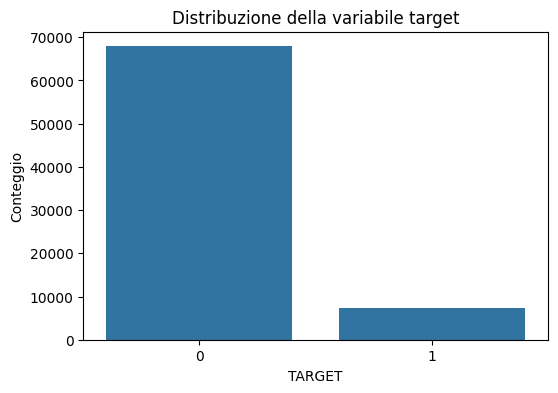

NAME_INCOME_TYPE
Working                 39178
Commercial associate    18067
Pensioner               12115
State servant            5889
Student                     7
Name: count, dtype: int64
NAME_EDUCATION_TYPE
Secondary / secondary special    52714
Higher education                 19187
Incomplete higher                 2526
Lower secondary                    782
Academic degree                     47
Name: count, dtype: int64
NAME_FAMILY_STATUS
Married                 50239
Single / not married    10214
Civil marriage           6715
Separated                4703
Widow                    3385
Name: count, dtype: int64
NAME_HOUSING_TYPE
House / apartment      67360
With parents            3273
Municipal apartment     2642
Rented apartment        1077
Office apartment         665
Co-op apartment          239
Name: count, dtype: int64
OCCUPATION_TYPE
non specificata          22125
Laborers                 13955
Sales staff               7398
Core staff                6925
Managers     

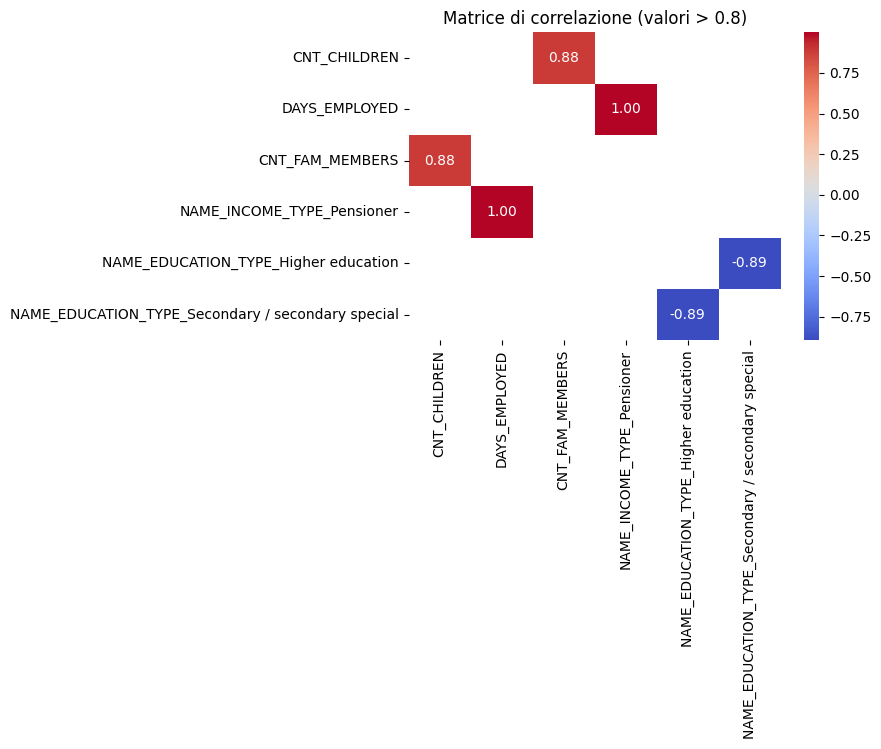

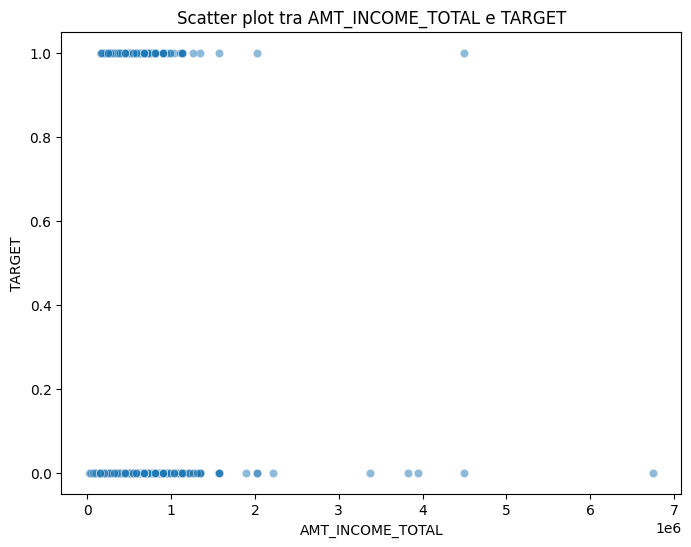

In [7]:
# Panoramica generale dei dati
df.info()
print(df.describe())
print(df.dtypes)

# Valutazione dei valori mancanti
missing_values = df.isna().sum()
print('missing values:')
print(missing_values[missing_values > 0])

df = df.drop(['ID'], axis = 1)
df.drop_duplicates(inplace=True)

# Sostituzione dei NaN in 'OCCUPATION_TYPE' con 'non specificata'
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('non specificata')

# Rimozione  delle righe che hanno più del 75% di valori NaN
threshold = len(df.columns) * 0.75
df = df.dropna(thresh=threshold)

# Analisi della distribuzione della variabile target
target_counts = df['TARGET'].value_counts(normalize=True) * 100
print(target_counts)

# Visualizzazione della distribuzione della variabile target
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df)
plt.title('Distribuzione della variabile target')
plt.xlabel('TARGET')
plt.ylabel('Conteggio')
plt.show()

# Trasformazione delle variabili binarie in 1 e 0
binary_columns = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
df[binary_columns] = df[binary_columns].replace({'Y': 1, 'N': 0})
df['CODE_GENDER'] = df['CODE_GENDER'].replace({'M': 1, 'F': 0})

df['AGE'] = df['DAYS_BIRTH'] / -365.25 #Per una maggior comprensione del dato
df = df.drop(columns=['DAYS_BIRTH'])

# Analisi delle variabili categoriali
categorial_columns = df.select_dtypes(include=['object']).columns
for col in categorial_columns:
    print(df[col].value_counts())

# Aggiunta di One-Hot Encoding alle variabili categoriali
df_encoded = pd.get_dummies(df, columns=categorial_columns, drop_first=True)
df_encoded = df_encoded.astype(int)  # Convertire True/False in 1/0
print("\nDati dopo One-Hot Encoding:")
print(df_encoded.head())

# Analisi delle variabili numeriche
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col not in ['ID', 'TARGET']]

for col in ['AMT_INCOME_TOTAL', 'AGE', 'DAYS_EMPLOYED']:
    print(f"\n{col}:\n", df[col].describe())

# Analisi delle correlazioni
corr_matrix = df_encoded.corr()
high_corr = corr_matrix[(corr_matrix.abs() > 0.8) & (corr_matrix != 1.0)] 

# Selezione delle colonne e delle righe con correlazioni elevate
high_corr_pairs = high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Visualizzazione della matrice di correlazione filtrata
plt.figure(figsize=(6, 4))
sns.heatmap(high_corr_pairs, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matrice di correlazione (valori > 0.8)')
plt.show()

# Scatter plot per visualizzare la relazione tra una variabile numerica e TARGET (per indagare singole variabili)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='TARGET', data=df, alpha=0.5)
plt.title('Scatter plot tra AMT_INCOME_TOTAL e TARGET')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('TARGET')
plt.show()


In [8]:
df_encoded.shape

(75256, 48)

#### Considerazioni dopo analisi dati

Bilanciamento delle Classi: Le classi nel dataset sono sbilanciate, rendendo necessario un intervento di bilanciamento per garantire risultati affidabili nei modelli successivi.

Dimensione del Dataset: La grande quantità di categorie, unita alla necessità di applicare one hot encoding, ha portato a una dimensione significativa del dataset. Ciò ha portato all'esclusione dall'analisi dei modelli Naive Bayes, che non sono in grado di catturare relazioni molto complesse, e del SVC per un tema di calcolo computazionale elevato e poca efficienza su dataset grandi.

Obiettivo di Trasparenza e Interpretabilità: Per garantire la massima trasparenza e interpretabilità dei risultati, ho deciso di non utilizzare modelli basati su reti neurali.

Modelli Selezionati per la Fase Successiva: 

- Regressione Lineare
- Random Forest

I modelli che saranno testati avranno come obiettivo quello di azzerare (o minimizzare) il numero di falsi negativi e identificre quindi tutti i pagatori affidabili e meritevoli di ricevere una carta di credito. Allo stesso tempo sarà incentivante cercare di ridurre al minimo anche i falsi positivi per evitare perdite di opportunità di allargamento della clientela da parte della banca. 

## Modelli di Classificazione

### Preparazione Dati

In [9]:
X = df_encoded.drop(['TARGET'], axis = 1).values
y = df_encoded['TARGET'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

### Regressione Lineare

In [10]:
#Sviluppo modello di regressione logistica
def fun_logistic_regression(X_train, X_test, y_train, y_test, standardize=False, method=None, ratio=1.0):
    """
    Addestra un modello di regressione logistica con diverse opzioni per gestire i dati sbilanciati.

    Parametri:
    - X_train, X_test: Caratteristiche per l'addestramento e il test.
    - y_train, y_test: Etichette target per l'addestramento e il test.
    - standardize (bool): Se applicare o meno la standardizzazione alle caratteristiche.
    - method (str): Il metodo per gestire lo sbilanciamento delle classi. Le opzioni sono:
      - None: Nessuna modifica
      - 'class_weight': Applica i pesi alle classi
      - 'smote': Applica SMOTE per il sovracampionamento
      - 'undersample': Applica il sottocampionamento per bilanciare le classi
    - ratio (float): Il rapporto tra la classe minoritaria e quella maggioritaria nel ricampionamento.

    Restituisce:
    - lr: Modello di regressione logistica addestrato.
    - y_pred_train, y_pred_test: Predizioni sui set di addestramento e test.
    - y_proba_train, y_proba_test: Probabilità previste sui set di addestramento e test.
    """

    if standardize:
        ss = StandardScaler()
        X_train = ss.fit_transform(X_train)
        X_test = ss.transform(X_test)

    if method == 'class_weight':
        lr = LogisticRegression(class_weight="balanced", random_state=0)
    elif method == 'smote':
        smote = SMOTE(sampling_strategy=ratio, random_state=0)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        print(f"After SMOTE: {Counter(y_train)}")
        lr = LogisticRegression(random_state=0)
    elif method == 'undersample':
        rus = RandomUnderSampler(sampling_strategy=ratio, random_state=0)
        X_train, y_train = rus.fit_resample(X_train, y_train)
        print(f"After undersample: {Counter(y_train)}")
        lr = LogisticRegression(random_state=0)
    else:
        lr = LogisticRegression(random_state=0)

    lr.fit(X_train, y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    y_proba_train = lr.predict_proba(X_train)
    y_proba_test = lr.predict_proba(X_test)

    print(classification_report(y_test, y_pred_test))
    # 
    # Calcolo della matrice di confusione
    cm = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Matrice di Confusione')
    plt.show()

    # Calcolo dell'AUC
    auc_score_train = roc_auc_score(y_train, y_proba_train[:, 1])
    auc_score_test = roc_auc_score(y_test, y_proba_test[:, 1])
    print(f"AUC Score (Train): {auc_score_train:.4f}")
    print(f"AUC Score (Test): {auc_score_test:.4f}")


    return lr, y_pred_train, y_pred_test, y_proba_train, y_proba_test


No transformation:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     20382
           1       0.47      0.13      0.21      2195

    accuracy                           0.90     22577
   macro avg       0.69      0.56      0.58     22577
weighted avg       0.87      0.90      0.88     22577



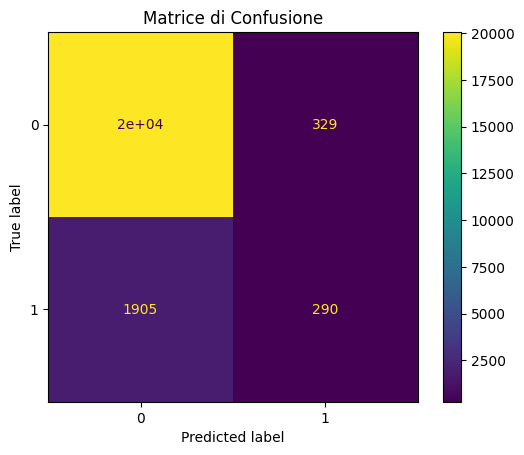

AUC Score (Train): 0.8973
AUC Score (Test): 0.8960
----------------------------------------------------------------------------------------------
Class weight:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88     20382
           1       0.31      0.88      0.46      2195

    accuracy                           0.80     22577
   macro avg       0.65      0.83      0.67     22577
weighted avg       0.92      0.80      0.84     22577



c:\Users\monte\miniconda3\envs\chatbot-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


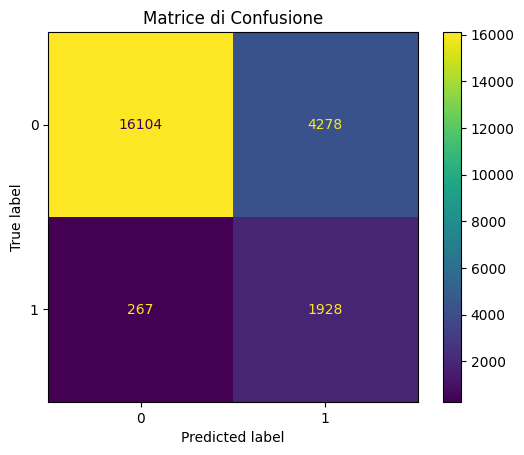

AUC Score (Train): 0.9009
AUC Score (Test): 0.8997
----------------------------------------------------------------------------------------------
Oversampling Ratio 1:
After SMOTE: Counter({0: 47504, 1: 47504})
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     20382
           1       0.32      0.86      0.46      2195

    accuracy                           0.81     22577
   macro avg       0.65      0.83      0.67     22577
weighted avg       0.92      0.81      0.84     22577



c:\Users\monte\miniconda3\envs\chatbot-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


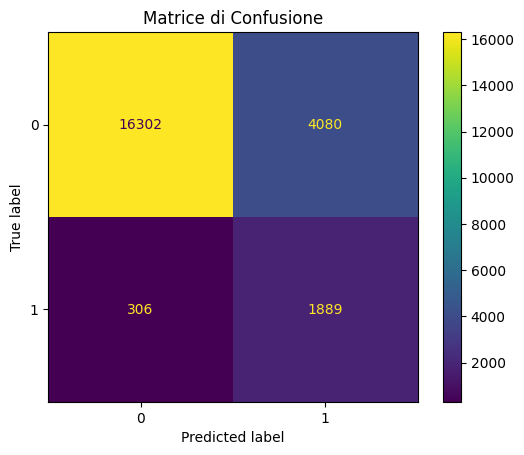

AUC Score (Train): 0.9075
AUC Score (Test): 0.8996
----------------------------------------------------------------------------------------------
Undersampling Ratio 1:
After undersample: Counter({0: 5175, 1: 5175})
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     20382
           1       0.30      0.87      0.45      2195

    accuracy                           0.79     22577
   macro avg       0.64      0.83      0.66     22577
weighted avg       0.92      0.79      0.83     22577



c:\Users\monte\miniconda3\envs\chatbot-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


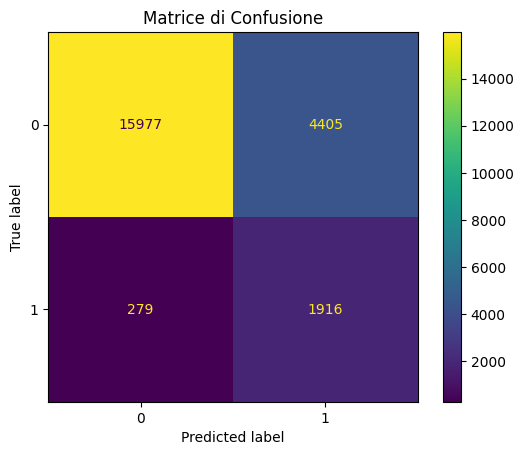

AUC Score (Train): 0.8974
AUC Score (Test): 0.8947
----------------------------------------------------------------------------------------------
Oversampling Ratio 0.5:
After SMOTE: Counter({0: 47504, 1: 23752})
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     20382
           1       0.36      0.69      0.48      2195

    accuracy                           0.85     22577
   macro avg       0.66      0.78      0.70     22577
weighted avg       0.90      0.85      0.87     22577



c:\Users\monte\miniconda3\envs\chatbot-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


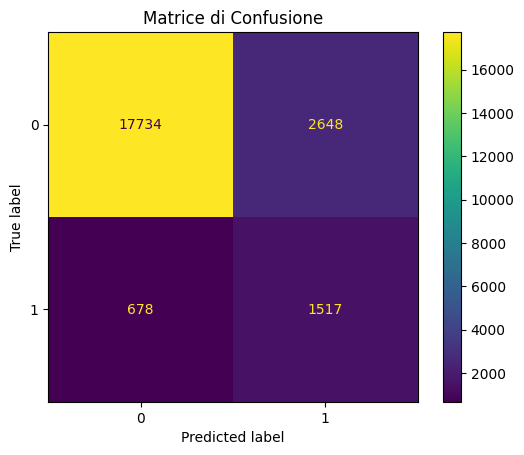

AUC Score (Train): 0.9061
AUC Score (Test): 0.8993
----------------------------------------------------------------------------------------------
Undersampling Ratio 0.5:
After undersample: Counter({0: 10350, 1: 5175})
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     20382
           1       0.35      0.68      0.47      2195

    accuracy                           0.85     22577
   macro avg       0.66      0.77      0.69     22577
weighted avg       0.90      0.85      0.87     22577



c:\Users\monte\miniconda3\envs\chatbot-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


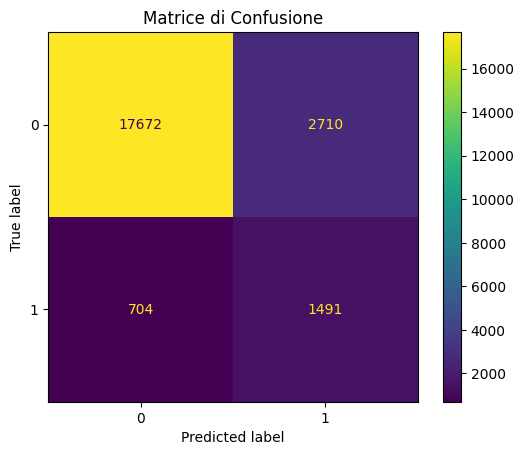

AUC Score (Train): 0.8981
AUC Score (Test): 0.8968
----------------------------------------------------------------------------------------------


In [11]:
# Funzione con diversi metodi di bilanciamento per selezionarne il migliore
print('No transformation:')
lr_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_logistic_regression(
    X_train, X_test, y_train, y_test, standardize=True, method=None)
print('----------------------------------------------------------------------------------------------')
print('Class weight:')
lr_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_logistic_regression(
    X_train, X_test, y_train, y_test, standardize=True, method='class_weight')
print('----------------------------------------------------------------------------------------------')
print('Oversampling Ratio 1:')
lr_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_logistic_regression(
    X_train, X_test, y_train, y_test, standardize=True, method='smote', ratio=1.0)
print('----------------------------------------------------------------------------------------------')
print('Undersampling Ratio 1:')
lr_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_logistic_regression(
    X_train, X_test, y_train, y_test, standardize=True, method='undersample', ratio=1.0)
print('----------------------------------------------------------------------------------------------')
print('Oversampling Ratio 0.5:')
lr_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_logistic_regression(
    X_train, X_test, y_train, y_test, standardize=True, method='smote', ratio=0.5)
print('----------------------------------------------------------------------------------------------')
print('Undersampling Ratio 0.5:')
lr_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_logistic_regression(
    X_train, X_test, y_train, y_test, standardize=True, method='undersample', ratio=0.5)
print('----------------------------------------------------------------------------------------------')


Undersampling Ratio 1:
After undersample: Counter({0: 5175, 1: 5175})
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     20382
           1       0.30      0.87      0.45      2195

    accuracy                           0.79     22577
   macro avg       0.64      0.83      0.66     22577
weighted avg       0.92      0.79      0.83     22577



c:\Users\monte\miniconda3\envs\chatbot-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


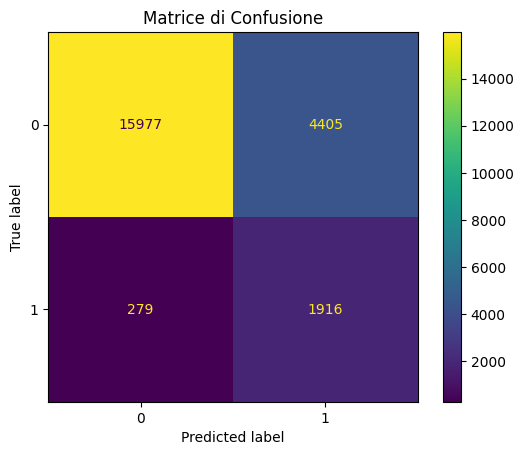

AUC Score (Train): 0.8974
AUC Score (Test): 0.8947


In [12]:
#Miglior risultato per la regressione:
print('Undersampling Ratio 1:')
lr_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_logistic_regression(
    X_train, X_test, y_train, y_test, standardize=True, method='undersample', ratio=1.0)

### Naive Bayes

In [13]:
# def fun_naive_bayes(X_train, X_test, y_train, y_test, standardize=False, method=None, ratio=1.0, model_type='gaussian'):
#     """
#     Addestra modelli Naive Bayes con diverse opzioni per gestire i dati sbilanciati e con cinque varianti di Naive Bayes.

#     Parametri:
#     - X_train, X_test: Caratteristiche per l'addestramento e il test.
#     - y_train, y_test: Etichette target per l'addestramento e il test.
#     - standardize (bool): Se applicare o meno la standardizzazione alle caratteristiche.
#     - method (str): Il metodo per gestire lo sbilanciamento delle classi. Le opzioni sono:
#       - None: Nessuna modifica
#       - 'smote': Applica SMOTE per il sovracampionamento
#       - 'undersample': Applica il sottocampionamento per bilanciare le classi
#     - ratio (float): Il rapporto tra la classe minoritaria e quella maggioritaria nel ricampionamento.
#     - model_type (str): Tipo di modello Naive Bayes da utilizzare ('gaussian', 'multinomial', 'bernoulli', 'complement', 'categorical').

#     Restituisce:
#     - nb_model: Modello Naive Bayes addestrato.
#     - y_pred_train, y_pred_test: Predizioni sui set di addestramento e test.
#     - y_proba_train, y_proba_test: Probabilità previste sui set di addestramento e test.
#     """

#     # Standardizzazione se necessario
#     if standardize and model_type == 'gaussian':
#         ss = StandardScaler()
#         X_train = ss.fit_transform(X_train)
#         X_test = ss.transform(X_test)

#     # Gestione sbilanciamento classi
#     if method == 'smote':
#         smote = SMOTE(sampling_strategy=ratio, random_state=0)
#         X_train, y_train = smote.fit_resample(X_train, y_train)
#         print(f"After SMOTE: {Counter(y_train)}")
#     elif method == 'undersample':
#         rus = RandomUnderSampler(sampling_strategy=ratio, random_state=0)
#         X_train, y_train = rus.fit_resample(X_train, y_train)
#         print(f"After undersample: {Counter(y_train)}")

#     # Seleziona il modello Naive Bayes in base a 'model_type'
#     model_mapping = {
#         'gaussian': GaussianNB(),
#         'multinomial': MultinomialNB(),
#         'bernoulli': BernoulliNB(),
#         'complement': ComplementNB(),
#         'categorical': CategoricalNB()  # Assicurati di avere la versione corretta di scikit-learn
#     }

#     nb_model = model_mapping.get(model_type)
#     if nb_model is None:
#         raise ValueError("model_type must be 'gaussian', 'multinomial', 'bernoulli', 'complement', or 'categorical'")

#     # Addestra il modello
#     nb_model.fit(X_train, y_train)

#     # Predizioni e probabilità
#     y_pred_train = nb_model.predict(X_train)
#     y_pred_test = nb_model.predict(X_test)

#     if hasattr(nb_model, "predict_proba"):
#         y_proba_train = nb_model.predict_proba(X_train)
#         y_proba_test = nb_model.predict_proba(X_test)
#     else:
#         y_proba_train = y_pred_train  # Se predict_proba non è supportato, usa le predizioni
#         y_proba_test = y_pred_test

#     # Report di classificazione
#     print("Classification Report (Test):")
#     print(classification_report(y_test, y_pred_test))

#     # Calcolo della matrice di confusione
#     cm = confusion_matrix(y_test, y_pred_test)
#     ConfusionMatrixDisplay(cm).plot()
#     plt.title('Matrice di Confusione')
#     plt.show()

#     # Calcolo dell'AUC
#     if len(set(y_train)) == 2:  # AUC ha senso solo per problemi binari
#         auc_score_train = roc_auc_score(y_train, y_proba_train[:, 1])
#         auc_score_test = roc_auc_score(y_test, y_proba_test[:, 1])
#         print(f"AUC Score (Train): {auc_score_train:.4f}")
#         print(f"AUC Score (Test): {auc_score_test:.4f}")
#     else:
#         print("AUC score not calculated as the problem is not binary.")

#     return nb_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test

# # Esempio di utilizzo
# X_train_sample = X_train[:50000]
# y_train_sample = y_train[:50000]
# X_test_sample = X_test[:50000]
# y_test_sample = y_test[:50000]

# nb_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_naive_bayes(
#     X_train_sample, X_test_sample, y_train_sample, y_test_sample, standardize=True, method='smote', ratio=1.0, model_type='gaussian')

### Support Vector Machine

In [14]:
# def fun_svc(X_train, X_test, y_train, y_test, standardize=False, method=None, ratio=1.0, kernel='linear'):
#     """
#     Addestra un modello SVC con diverse opzioni per gestire i dati sbilanciati e con possibilità di scegliere kernel.

#     Parametri:
#     - X_train, X_test: Caratteristiche per l'addestramento e il test.
#     - y_train, y_test: Etichette target per l'addestramento e il test.
#     - standardize (bool): Se applicare o meno la standardizzazione alle caratteristiche.
#     - method (str): Il metodo per gestire lo sbilanciamento delle classi. Le opzioni sono:
#       - None: Nessuna modifica
#       - 'class_weight': Applica i pesi alle classi
#       - 'smote': Applica SMOTE per il sovracampionamento
#       - 'undersample': Applica il sottocampionamento per bilanciare le classi
#     - ratio (float): Il rapporto tra la classe minoritaria e quella maggioritaria nel ricampionamento.
#     - kernel (str): Tipo di kernel da usare nel modello SVC. Le opzioni sono: 'linear', 'poly', 'rbf'.

#     Restituisce:
#     - svc: Modello SVC addestrato.
#     - y_pred_train, y_pred_test: Predizioni sui set di addestramento e test.
#     - y_proba_train, y_proba_test: Probabilità previste sui set di addestramento e test.
#     """

#     if standardize:
#         ss = StandardScaler()
#         X_train = ss.fit_transform(X_train)
#         X_test = ss.transform(X_test)

#     if method == 'class_weight':
#         svc = SVC(kernel=kernel, class_weight={1:1}, probability=True, random_state=0)
#     elif method == 'smote':
#         smote = SMOTE(sampling_strategy=ratio, random_state=0)
#         X_train, y_train = smote.fit_resample(X_train, y_train)
#         print(f"After SMOTE: {Counter(y_train)}")
#         svc = SVC(kernel=kernel, probability=True, random_state=0)
#     elif method == 'undersample':
#         rus = RandomUnderSampler(sampling_strategy=ratio, random_state=0)
#         X_train, y_train = rus.fit_resample(X_train, y_train)
#         print(f"After undersample: {Counter(y_train)}")
#         svc = SVC(kernel=kernel, probability=True, random_state=0)
#     else:
#         svc = SVC(kernel=kernel, probability=True, random_state=0)

#     svc.fit(X_train, y_train)

#     y_pred_train = svc.predict(X_train)
#     y_pred_test = svc.predict(X_test)

#     y_proba_train = svc.predict_proba(X_train)
#     y_proba_test = svc.predict_proba(X_test)

#     # Report di classificazione
#     print(classification_report(y_test, y_pred_test))

#     # Calcolo dell'AUC
#     auc_score_train = roc_auc_score(y_train, y_proba_train[:, 1])
#     auc_score_test = roc_auc_score(y_test, y_proba_test[:, 1])
#     print(f"AUC Score (Train): {auc_score_train:.4f}")
#     print(f"AUC Score (Test): {auc_score_test:.4f}")

#     return svc, y_pred_train, y_pred_test, y_proba_train, y_proba_test

# X_train_sample = X_train[:50000]
# y_train_sample = y_train[:50000]

# X_test_sample = X_test[:50000]
# y_test_sample = y_test[:50000]

# svm_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_svc(
#     X_train_sample, X_test_sample, y_train_sample, y_test_sample, standardize=True, method='smote', ratio=1.0, kernel='rbf')

### Random forest

In [15]:
#Algoritmo modello Random Forest
def fun_random_forest(X_train, X_test, y_train, y_test, standardize=False, method=None, ratio=1.0):
    """
    Addestra un modello Random Forest con opzioni per gestire dati sbilanciati e ricerca iperparametri.

    Parametri:
    - X_train, X_test: Caratteristiche per l'addestramento e il test.
    - y_train, y_test: Etichette target per l'addestramento e il test.
    - standardize (bool): Se applicare o meno la standardizzazione alle caratteristiche.
    - method (str): Il metodo per gestire lo sbilanciamento delle classi. Le opzioni sono:
      - None: Nessuna modifica
      - 'class_weight': Applica i pesi alle classi
      - 'smote': Applica SMOTE per il sovracampionamento
      - 'undersample': Applica il sottocampionamento per bilanciare le classi
    - ratio (float): Il rapporto tra la classe minoritaria e quella maggioritaria nel ricampionamento.

    Restituisce:
    - best_rf: Modello Random Forest addestrato con i migliori iperparametri.
    - y_pred_train, y_pred_test: Predizioni sui set di addestramento e test.
    - y_proba_train, y_proba_test: Probabilità previste sui set di addestramento e test.
    """

    if standardize:
        ss = StandardScaler()
        X_train = ss.fit_transform(X_train)
        X_test = ss.transform(X_test)

    if method == 'class_weight':
        rf = RandomForestClassifier(class_weight='balanced', random_state=0)
    elif method == 'smote':
        smote = SMOTE(sampling_strategy=ratio, random_state=0)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        print(f"After SMOTE: {Counter(y_train)}")
        rf = RandomForestClassifier(random_state=0)
    elif method == 'undersample':
        rus = RandomUnderSampler(sampling_strategy=ratio, random_state=0)
        X_train, y_train = rus.fit_resample(X_train, y_train)
        print(f"After undersample: {Counter(y_train)}")
        rf = RandomForestClassifier(random_state=0)
    else:
        rf = RandomForestClassifier(random_state=0)

    # Definizione della griglia di iperparametri
    param_grid = {
        'n_estimators': [50, 100],
        'max_features': [0.4],
        'max_depth': [5],
        'min_samples_split': [5, 10],
    }

    # Ricerca iperparametrica con GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Miglior modello
    best_rf = grid_search.best_estimator_

    # Predizioni
    y_pred_train = best_rf.predict(X_train)
    y_pred_test = best_rf.predict(X_test)

    # Probabilità
    y_proba_train = best_rf.predict_proba(X_train)
    y_proba_test = best_rf.predict_proba(X_test)

    # Modifica della soglia per minimizzare i falsi negativi
    threshold = 0.3  # Soglia inferiore per aumentare la recall
    y_test_pred = (y_proba_test[:, 1] >= threshold).astype(int)  # Classificazione in base alla nuova soglia

    # Report di classificazione
    print(classification_report(y_test, y_test_pred))

    # Calcolo della matrice di confusione
    cm = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Matrice di Confusione')
    plt.show()

    # Calcolo dell'AUC
    auc_score_train = roc_auc_score(y_train, y_proba_train[:, 1])
    auc_score_test = roc_auc_score(y_test, y_proba_test[:, 1])
    print(f"AUC Score (Train): {auc_score_train:.4f}")
    print(f"AUC Score (Test): {auc_score_test:.4f}")

    return best_rf, y_pred_train, y_pred_test, y_proba_train, y_proba_test

# # Esegui la funzione con Random Forest e Grid Search
# rf_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_random_forest(
#     X_train, X_test, y_train, y_test, standardize=True, method='smote', ratio=1.0)

Class weight:
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     20382
           1       0.54      1.00      0.70      2195

    accuracy                           0.92     22577
   macro avg       0.77      0.95      0.83     22577
weighted avg       0.96      0.92      0.93     22577



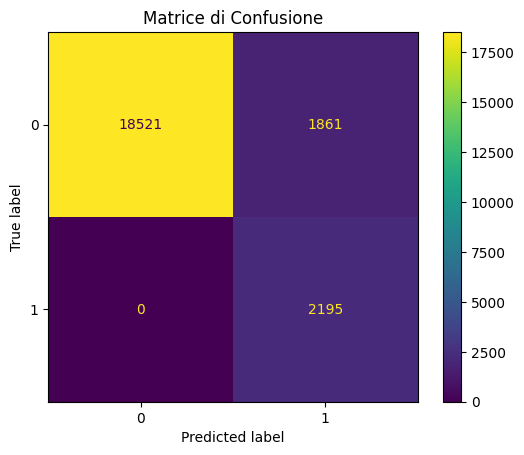

AUC Score (Train): 0.9578
AUC Score (Test): 0.9570
----------------------------------------------------------------------------------------------
Oversampling Ratio 1:
After SMOTE: Counter({0: 47504, 1: 47504})
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     20382
           1       0.56      0.98      0.71      2195

    accuracy                           0.92     22577
   macro avg       0.78      0.95      0.84     22577
weighted avg       0.96      0.92      0.93     22577



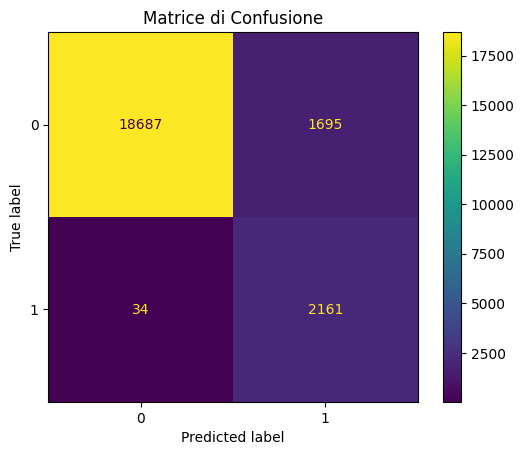

AUC Score (Train): 0.9786
AUC Score (Test): 0.9553
----------------------------------------------------------------------------------------------
Undersampling Ratio 1:
After undersample: Counter({0: 5175, 1: 5175})
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     20382
           1       0.54      1.00      0.70      2195

    accuracy                           0.92     22577
   macro avg       0.77      0.95      0.83     22577
weighted avg       0.96      0.92      0.93     22577



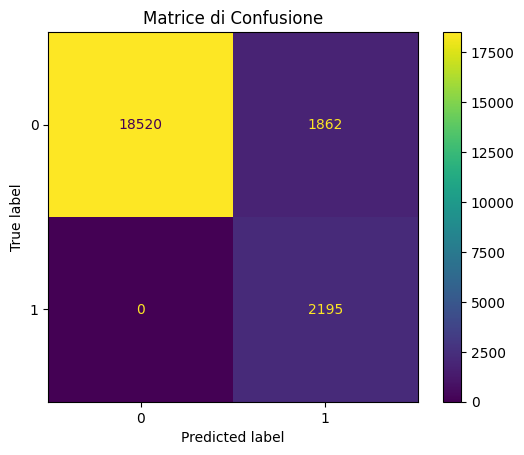

AUC Score (Train): 0.9643
AUC Score (Test): 0.9563
----------------------------------------------------------------------------------------------
Oversampling Ratio 0.5:
After SMOTE: Counter({0: 47504, 1: 23752})
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     20382
           1       0.56      0.98      0.71      2195

    accuracy                           0.92     22577
   macro avg       0.78      0.95      0.83     22577
weighted avg       0.96      0.92      0.93     22577



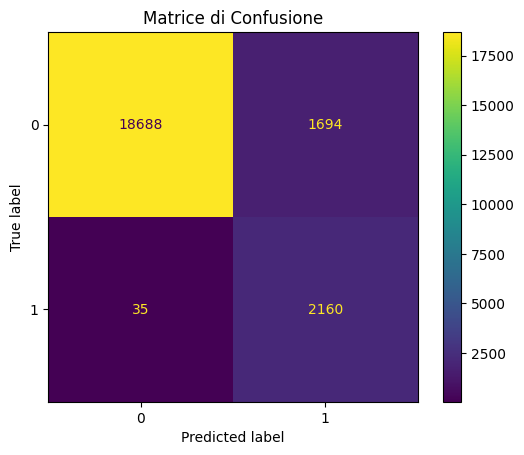

AUC Score (Train): 0.9760
AUC Score (Test): 0.9553
----------------------------------------------------------------------------------------------
Undersampling Ratio 0.5:
After undersample: Counter({0: 10350, 1: 5175})
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     20382
           1       0.54      1.00      0.70      2195

    accuracy                           0.92     22577
   macro avg       0.77      0.95      0.83     22577
weighted avg       0.96      0.92      0.93     22577



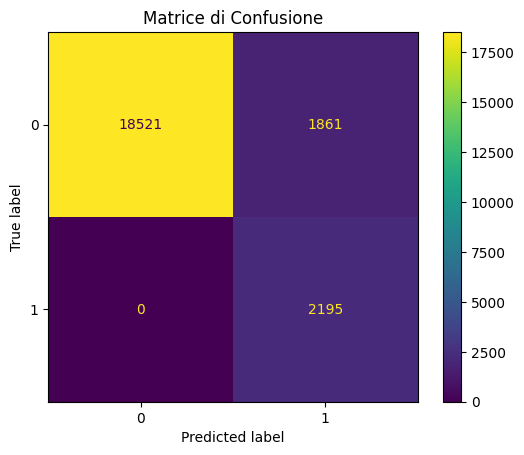

AUC Score (Train): 0.9619
AUC Score (Test): 0.9559
----------------------------------------------------------------------------------------------


In [16]:
# Funzione con diversi metodi di bilanciamento per selezionarne il migliore
print('Class weight:')
rf_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_random_forest(
    X_train, X_test, y_train, y_test, standardize=True, method='class_weight')
print('----------------------------------------------------------------------------------------------')
print('Oversampling Ratio 1:')
rf_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_random_forest(
    X_train, X_test, y_train, y_test, standardize=True, method='smote', ratio=1.0)
print('----------------------------------------------------------------------------------------------')
print('Undersampling Ratio 1:')
rf_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_random_forest(
    X_train, X_test, y_train, y_test, standardize=True, method='undersample', ratio=1.0)
print('----------------------------------------------------------------------------------------------')
print('Oversampling Ratio 0.5:')
rf_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_random_forest(
    X_train, X_test, y_train, y_test, standardize=True, method='smote', ratio=0.5)
print('----------------------------------------------------------------------------------------------')
print('Undersampling Ratio 0.5:')
rf_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_random_forest(
    X_train, X_test, y_train, y_test, standardize=True, method='undersample', ratio=0.5)
print('----------------------------------------------------------------------------------------------')


Undersampling Ratio 0.5:
After undersample: Counter({0: 10350, 1: 5175})
Fitting 5 folds for each of 4 candidates, totalling 20 fits
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     20382
           1       0.54      1.00      0.70      2195

    accuracy                           0.92     22577
   macro avg       0.77      0.95      0.83     22577
weighted avg       0.96      0.92      0.93     22577



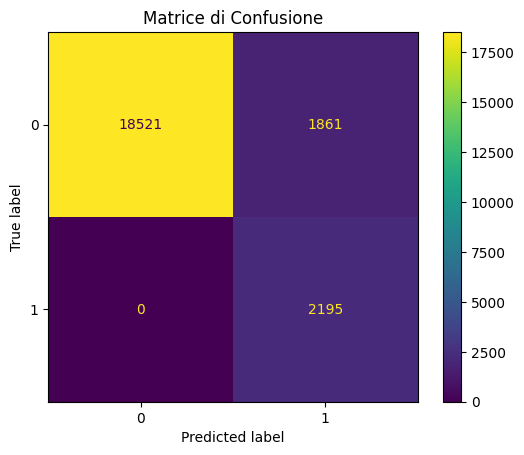

AUC Score (Train): 0.9619
AUC Score (Test): 0.9559
----------------------------------------------------------------------------------------------


In [17]:
print('Undersampling Ratio 0.5:')
rf_model, y_pred_train, y_pred_test, y_proba_train, y_proba_test = fun_random_forest(
    X_train, X_test, y_train, y_test, standardize=True, method='undersample', ratio=0.5)
print('----------------------------------------------------------------------------------------------')

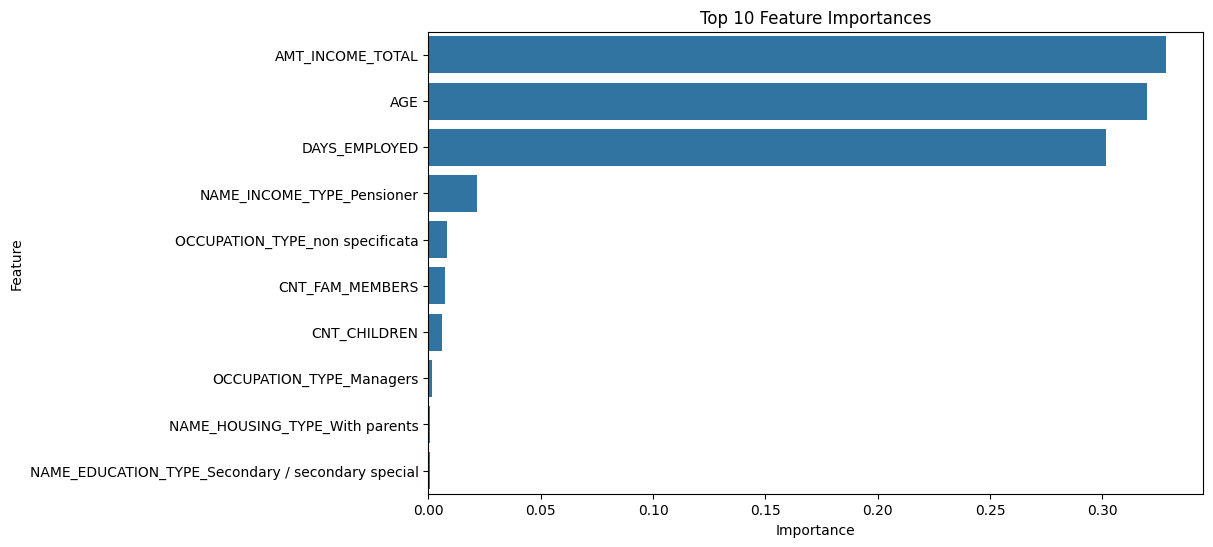

In [18]:
def plot_feature_importance(model, feature_names, top_n=10):
    """
    Visualizza le top N feature più importanti di un modello Random Forest.
    
    Parametri:
    - model: Modello Random Forest addestrato.
    - feature_names: Lista dei nomi delle feature.
    - top_n: Numero di feature più importanti da visualizzare (default = 10).
    """

    importances = model.feature_importances_
    
    # DataFrame con i nomi delle feature
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Ordina le feature in base all'importanza
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Visualizza top N feature
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
    plt.title(f'Top {top_n} Feature Importances')
    plt.show()

# Esegui funzione
df_encoded = df_encoded.drop(columns=['TARGET'])
column_names = df_encoded.columns
plot_feature_importance(rf_model, column_names, top_n=10)

## Conclusione

I risultati dei modelli evidenziano che, in questo contesto, il Random Forest offre prestazioni superiori rispetto alla Regressione Logistica nell'identificare i clienti più affidabili per l'emissione di carte di credito. Dopo aver bilanciato il dataset, ottimizzato gli iperparametri, utilizzato l'F1 score come metrica di valutazione e adattato la soglia di classificazione per la classe positiva, il modello Random Forest ha individuato accuratamente tutti i clienti affidabili, senza errori di falsi negativi. I falsi positivi — clienti erroneamente rifiutati — sono stati ridotti a 4.806 su 101.528 nel set di test, rappresentando meno del 5%.

Questo risultato dimostra un eccellente compromesso tra precisione e recall, rendendo il Random Forest altamente efficiente per questo progetto. Inoltre, l'analisi delle feature ha permesso di identificare i principali fattori che guidano le decisioni del modello, garantendo maggiore trasparenza e interpretabilità.

###CORREZIONE: rimuovere ID e duplicati - risultato non cambia